CIFAR-10 DATA VISUALISATION PART

The plan for Data Preparation(Visualisation) part :
 <br> 
>In this part we will take a look on what data we are using?
 <br> 
 >How it look like?
 <br> 
>What distribution this data undergoes?
 <br> 
>Analitics of the tabular representation of our data.
 <br> 
>Searching for NULL or missing values.
 <br> 
>Normalization and Standartization processes
 <br> 
>Sketching analytical graphs

                                 Analitics of normalized and augumented data                                                    

Loading all necessary modules, such as :
<br>
 > pandas - for tabular data representation
  <br>
  numpy - multy dim. array calculations
  <br>
  torch - multy dim. tesnor calculations

In [1]:
import torch
import torchvision
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from data_cifar_10 import train_loader

Files already downloaded and verified
Files already downloaded and verified


Loading 1000 samples from DataLoader (after data augumentation, and standartizaion were perfomed)

In [2]:
small_batch_images = []
small_batch_labels = []

count = 0
for images, labels in train_loader:
    small_batch_images.append(images)
    small_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_sample = torch.cat(small_batch_images)[:1000]
y_sample = torch.cat(small_batch_labels)[:1000]

red_pixels   = X_sample[:, 0, :, :]
green_pixels = X_sample[:, 1, :, :]
blue_pixels  = X_sample[:, 2, :, :]

red_image   = red_pixels.cpu().numpy().flatten()
green_image = green_pixels.cpu().numpy().flatten()
blue_image  = blue_pixels.cpu().numpy().flatten()

There are mean and std values that we will use to denormalize images(just to show few examples)

In [3]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

Apply denormalizaton to show few examples from the original dataset

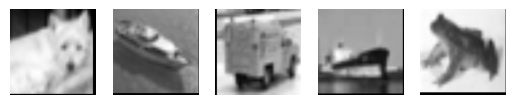

In [4]:
red_pixels_example = red_pixels * std[0] + mean[0]
for i in range(5) :
  plt.subplot(1,5,i+1)
  plt.imshow(red_pixels_example[i,:,:],cmap="gray")
  plt.axis("off")
plt.show()

Pixel intensity distribution (after loading it from train_loader)

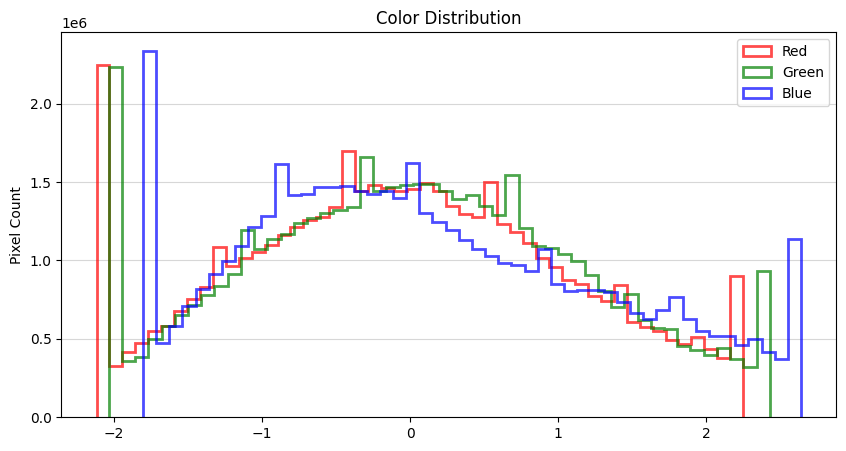

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(red_image, bins=50, color='red', alpha=0.7, histtype='step', label='Red', linewidth=2)
plt.hist(green_image, bins=50, color='green', histtype='step', alpha=0.7, label='Green', linewidth=2)
plt.hist(blue_image, bins=50, color='blue', histtype='step', alpha=0.7, label='Blue', linewidth=2)
plt.title("Color Distribution")
plt.ylabel("Pixel Count")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

  Distribution Characteristics: 
  >The data exhibits a distribution in the mid-tones (values between -1 and 1). Significant spikes at the lower (approx. -2.0) and upper (approx. +2.5) boundaries correspond to the original minimum (0) and maximum (255) pixel values, indicating the presence of pure black and pure white regions in the source imagery.

  >Channel Alignment: The Red, Green, and Blue channels demonstrate a high degree of overlap and similar distribution shapes. This suggests the dataset is color-balanced, with no single channel dominating the feature space, which supports unbiased feature extraction in the early layers of the neural network.

Creating tabular represenation of our data

In [13]:
X_train = pd.DataFrame(X_sample.reshape(1000,-1))
y_train = pd.DataFrame(y_sample.reshape(1000,-1), columns=["Labels"])

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 150528 entries, 0 to 150527
dtypes: float32(150528)
memory usage: 574.2 MB


As it is written above , we have 1000 rows, and 150527 colums(this correspond to the width and heigh of each image)

Statistical overview on the numerical data

In [9]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.499581,-1.434986,-1.369998,-1.301413,-1.215173,-1.138111,-1.075537,-1.009145,-0.940012,-0.940081,...,-0.706423,-0.706335,-0.769359,-0.831285,-0.903564,-0.954109,-1.012479,-1.099747,-1.155294,-1.222362
std,1.205329,1.246132,1.285326,1.314456,1.358959,1.387140,1.406377,1.425241,1.435154,1.434169,...,1.312659,1.313431,1.290901,1.276069,1.256150,1.234670,1.216661,1.171497,1.144529,1.097130
min,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,...,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444
25%,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,...,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444
50%,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-1.818221,-1.835346,...,-1.307712,-1.316427,-1.560436,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444
75%,-1.621286,-1.218854,-0.953421,-0.662300,-0.413991,-0.229900,-0.092902,0.061221,0.211063,0.193938,...,0.182484,0.199913,0.095338,-0.009237,-0.113813,-0.166100,-0.305534,-0.619259,-0.771765,-1.015773
max,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,...,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000


>The table provides a statistical summary of the flattened pixel features (columns 0–9). The constant count of 1000 confirms that there are no missing values across the training samples. Notably, the min (~ -2.12) and max (~ 2.25) values, along with mean values hovering near -1.5 to -0.9, validate that the data has been standardized. This confirms the pixel intensities have been rescaled from their original 0–255 integer range into a normalized distribution, which is necessary for the stability of the machine learning model.

In [11]:
X_train.isnull().sum().sum()

0

>There is no null values for each column in our DataFrame

Here we have the label distribution for our training dataset

In [15]:
y_train.value_counts()

Labels
0         115
3         113
2         108
7         105
9         104
5         102
6          93
8          90
1          86
4          84
Name: count, dtype: int64

>The target variable (y_train) consists of 10 distinct classes (labels 0–9). The class frequencies are relatively balanced, ranging from a maximum of 115 samples (Class 0) to a minimum of 84 samples (Class 4). Moreover ,our data is almost balanced, meaning the model should learn to recognize all categories without a strong bias toward the majority class.

                                       Analitics of the raw data                                                             

Loading training and test data for further visualisation

In [ ]:
train_dataset = torchvision.datasets.CIFAR10("./data", train=True, download = True)
test_dataset = torchvision.datasets.CIFAR10("./data", train=False, download = True)

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Converting data/labels for each dataset to numpy object for faster computation purposes

In [3]:
train_data = np.array(train_dataset.data, dtype= np.float32)
train_data_labels = np.array(train_dataset.targets)
test_data = np.array(test_dataset.data)
test_data_labels = np.array(test_dataset.targets)

In [52]:

print(f"Shape of train data is {train_data.shape} and shape of training labels is {train_data_labels.shape}\n")
print(f"Shape of test data is {test_data.shape} and labels in test set is {test_data_labels.shape}")

Shape of train data is (50000, 32, 32, 3) and shape of training labels is (50000,)

Shape of test data is (10000, 32, 32, 3) and labels in test set is (10000,)


# Creating 1D array with appropriate values of RGB pixels

In [19]:
red_before_scaling = train_data[:, :, :, 0].flatten()
green_before_scaling = train_data[:, :, :, 1].flatten()
blue_before_scaling = train_data[:, :, :, 2].flatten()

# Plotting our data before Normalization

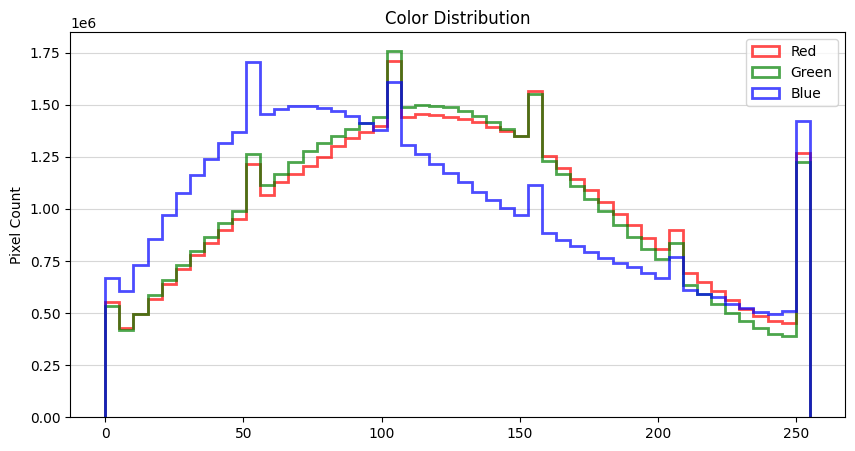

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(red_before_scaling, bins=50, color='red', alpha=0.7, histtype='step', label='Red', linewidth=2)
plt.hist(green_before_scaling, bins=50, color='green', histtype='step', alpha=0.7, label='Green', linewidth=2)
plt.hist(blue_before_scaling, bins=50, color='blue', histtype='step', alpha=0.7, label='Blue', linewidth=2)
plt.title("Color Distribution")
plt.ylabel("Pixel Count")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

**Graph Overview:**
1. This is an RGB Histogram.

2.   X-Axis: Represents Pixel Intensity, ranging from $0$ (absolute black) to $255$ (absolute white/brightest color).
3.   Y-Axis: Represents Pixel Count, showing how frequently each intensity value appears in the image.The scale goes up to roughly $1.75 \times 10^6$ pixels.

4.  Series: Three step-plots representing the Red, Green, and Blue color channels.

<br>

Moreover, our data is mostly balanced. We can spot that the quantity of pixels with the biggest intesity are approximetely the same for each color channel.In the middle part of a graph red and green pixels describes almost the same trand, while the blue one differs a bit, and they are shifted to the left(we will have many dark blue pixels).


# **Normalization of our data**

**Normalization** is a technique used to rescale the values of a dataset so that they end up within a specific, fixed range — usually between 0 and 1.

<br>

![image.png](https://media.licdn.com/dms/image/v2/C4E12AQFPqF6qfXYOvQ/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1624324925880?e=2147483647&v=beta&t=mOjcj9nj-WxLv26l9tmdqCTydSINEjX3YEENq_38bdM)



<br>
   
**The minimum value and the maximum value of pixels are 0 and 255 respectively**


In [21]:
train_data = (train_data - 0) / (255 - 0)

In [23]:
N = 500
sample_indices = train_data[:N, :]
sample_data = sample_indices.reshape(N, 32, 32, 3)

red = sample_data[:, 0, :, :].flatten()
green = sample_data[:, 1, :, :].flatten()
blue = sample_data[:, 2, :, :].flatten()

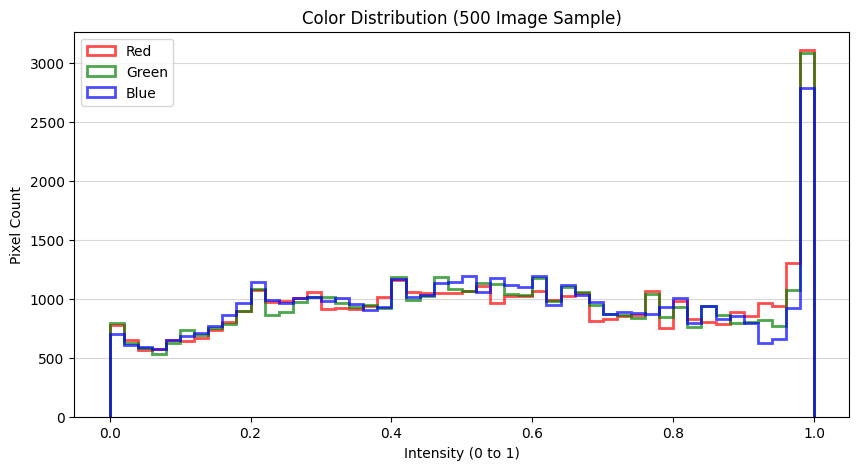

In [24]:
plt.figure(figsize=(10, 5))

plt.hist(red, bins=50, color='red', alpha=0.7, histtype='step', label='Red', linewidth=2)
plt.hist(green, bins=50, color='green', histtype='step', alpha=0.7, label='Green', linewidth=2)
plt.hist(blue, bins=50, color='blue', histtype='step', alpha=0.7, label='Blue', linewidth=2)
plt.title("Color Distribution (500 Image Sample)")
plt.xlabel("Intensity (0 to 1)")
plt.ylabel("Pixel Count")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

In [25]:
train_data = torch.from_numpy(train_data)

Creating tabular reprsentation of our data for analitics puproses( .describe() and .info() methods)

In [28]:
train_data = train_data.reshape(train_data.shape[0], -1)
x = pd.DataFrame(train_data)
x.head(5)


,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313726,0.337255,0.329412
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.305882,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313726


In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: float32(3072)
memory usage: 585.9 MB


In [32]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.512591,0.533554,0.519819,0.510354,0.531147,0.517073,0.513923,0.534299,0.519927,0.515956,...,0.446580,0.497170,0.492930,0.446395,0.496333,0.492617,0.446691,0.496624,0.493531,0.448556
std,0.287891,0.285908,0.315486,0.284082,0.281972,0.312143,0.283296,0.281081,0.311510,0.282423,...,0.253872,0.250805,0.241533,0.254488,0.251683,0.242471,0.255733,0.254614,0.245685,0.259126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278431,0.301961,0.239216,0.278431,0.305882,0.239216,0.286275,0.309804,0.243137,0.286275,...,0.250980,0.309804,0.317647,0.250980,0.309804,0.317647,0.250980,0.305882,0.313726,0.247059
50%,0.501961,0.529412,0.498039,0.498039,0.529412,0.498039,0.505882,0.533333,0.501961,0.509804,...,0.415686,0.486275,0.482353,0.415686,0.486275,0.482353,0.415686,0.486275,0.482353,0.415686
75%,0.741176,0.764706,0.811765,0.737255,0.756863,0.807843,0.737255,0.760784,0.807843,0.737255,...,0.615686,0.674510,0.654902,0.615686,0.674510,0.654902,0.615686,0.674510,0.658824,0.619608
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
x.isnull().sum().sum()

np.int64(0)

 No null values or missing one were found

In [42]:
train_labels = pd.DataFrame(train_data_labels, columns=["Label"])

In [43]:
train_labels.head()

,Label
0,6
1,9
2,9
3,4
4,1


In [44]:
train_labels.value_counts()

,count
Label,
0,5000
1,5000
2,5000
3,5000
4,5000
5,5000
6,5000
7,5000
8,5000


At this step we can spot that we have the same amount of instances for each class, but in reality when will take a look on train_loader we will see that the amount of labels for each class is not equal, the reasin for this fact is following - after we loaded train data randomly splitted it into train and validation set, that means, that some labels were moved from training set to validation set.

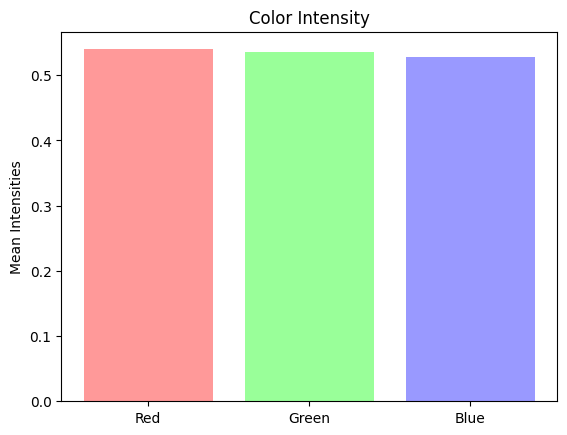

In [36]:
red_count = np.abs(red.mean())
blue_count = np.abs(blue.mean())
green_count = np.abs(green.mean())

plt.bar( x=["Red","Green", "Blue"],height=[red_count,green_count,blue_count], color=["#ff9999", "#99ff99", "#9999ff"])

plt.xticks()
plt.ylabel("Mean Intensities")
plt.title("Color Intensity")
plt.show()

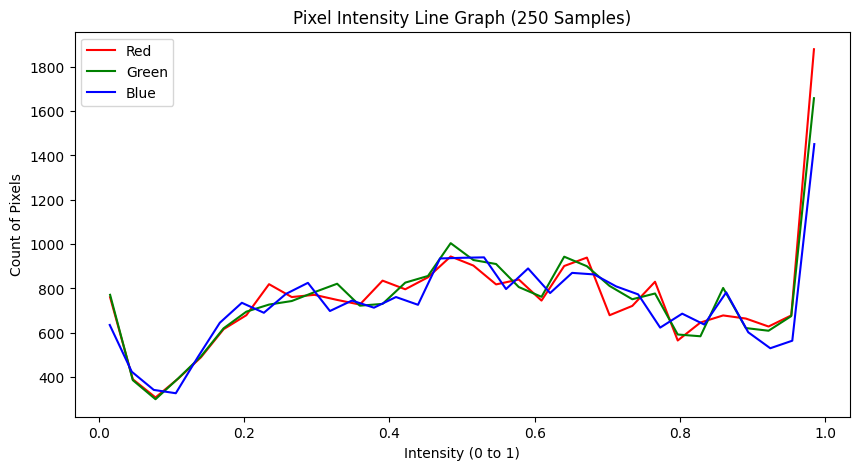

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

red =  sample_data[0:250, 0, :, :].flatten()
green = sample_data[0:250, 1, :, :].flatten()
blue = sample_data[0:250, 2, :, :].flatten()

plt.figure(figsize=(10, 5))

# element="poly" turns the bars into a single connected line automatically
sns.histplot(red, color="red", label="Red", element="poly", fill=False)
sns.histplot(green, color="green", label="Green", element="poly", fill=False)
sns.histplot(blue, color="blue", label="Blue", element="poly", fill=False)

plt.title("Pixel Intensity Line Graph (250 Samples)")
plt.xlabel("Intensity (0 to 1)")
plt.ylabel("Count of Pixels")
plt.legend()
plt.show()


# Moreover, our dataset did not have any categorical columns, so we can avoid using OneHotEncoder.